In [2]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot
import matplotlib.pyplot as plt

### Optimize 4% coverage device

optimize both for the effective overlap efficiency factor of 0.13 and 0.45. Ideally, the design parameters should not vary significantly between the two

In [3]:
desired_coverage = 0.04

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]
w_overlap0 = 15e-6
w_overlap_bnds = [5e-6, 40e-6]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11


w_overlap0 = 'circle'
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=True

veff_WAloverlap=.13 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_13, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fix_w_overlap=fix_w_overlap,
                                                    w_overlap = w_overlap0,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                     bounds = bounds, 
                                                    w_overlap_bounds=w_overlap_bnds)

veff_WAloverlap=.45 # measured
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_45, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fix_w_overlap=fix_w_overlap,
                                                      w_overlap = w_overlap0,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                    bounds = bounds, 
                                                    w_overlap_bounds=w_overlap_bnds)


Effective W/Al volume = 0.13
resolution: 139.3 [meV]
TES Length = 89.0 [μm]
Overlap Legth = 19.4 [μm]
Overlap Width = 38.7 [μm]
Fin Length = 94.7 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 4.000 [%]
Absolute phonon collection energy efficiency = 27.29 [%]
Number of TESs = 245
Rn = 350.0 [mOhms]
Close Packed: True
Phase margin = 322.9 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 209.2 [meV]
TES Length = 90.7 [μm]
Overlap Legth = 15.8 [μm]
Overlap Width = 31.6 [μm]
Fin Length = 93.5 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 4.000 [%]
Absolute phonon collection energy efficiency = 24.12 [%]
Number of TESs = 249
Rn = 350.0 [mOhms]
Close Packed: True
Phase margin = 238.3 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------




We can see that the TES length and Fin length are largely unchanged between the two designs, only the overlap region changes, which makes sense

(None, None)

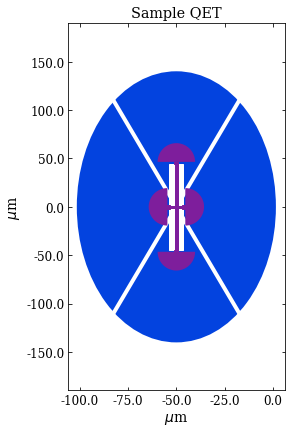

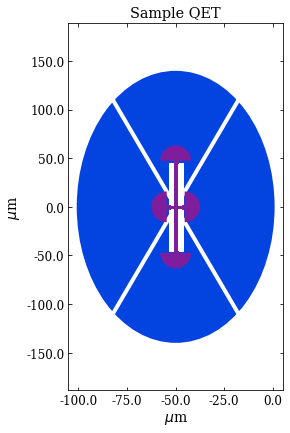

In [4]:
det_opt_13.plot_qet(), det_opt_45.plot_qet()

In [4]:
dark.utils.calc_angles(det_opt_1)

array([ 53.80557458, 126.19442542, 233.80557458, 306.19442542])

In [5]:
absorber = det_opt_13._absorber
qet = det_opt_13.QET
tes = det_opt_13.QET.TES
det = det_opt_13

n_fin = tes.n_fin
l = (det_opt_13.QET.TES.l + det_opt_45.QET.TES.l)/2
w = (det_opt_13.QET.TES.w + det_opt_45.QET.TES.w)/2
l_overlap = (det_opt_13.QET.TES.l_overlap + det_opt_45.QET.TES.l_overlap)/2
w_overlap = 'circle'
l_fin = (det_opt_13.QET.l_fin + det_opt_45.QET.l_fin)/2

abso1 = dark.Absorber(name=absorber._name, shape=absorber._shape,
                height=absorber._h, width=absorber._width,
                w_safety=absorber._w_safety)

tes1 = dark.TES(length=l, width=tes.w, l_overlap=l_overlap, n_fin=n_fin, sigma=tes.sigma,
           rn=tes.rn, rsh=tes.rsh, rp=tes.rp, L_tot=tes.L, tload=tes.tload, 
           w_overlap=w_overlap, w_fin_con=tes.w_fin_con, h=tes.h, 
           veff_WAloverlap=tes.veff_WAloverlap, veff_WFinCon=tes.veff_WFinCon, 
           con_type=tes.con_type, material=tes.material, operating_point=tes.fOp,
           alpha=tes.alpha, beta=tes.beta, wempty_fin=tes.wempty_fin, 
           wempty_tes=tes.wempty_tes, n=tes.n, Qp=tes.Qp, t_mc=tes.t_mc,
           w_overlap_stem=tes.w_overlap_stem,  l_c=tes.l_c, 
           l_overlap_pre_ellipse=tes.l_overlap_pre_ellipse)

qet1 = dark.QET(l_fin=l_fin, h_fin=qet.h_fin, TES=tes1, ahole=qet.ahole, ePQP=qet.ePQP,
           eff_absb=qet.eff_absb, nhole_per_fin=qet.nhole_per_fin, 
           type_qp_eff=qet.type_qp_eff)

det1 = dark.Detector(abso1, qet1, n_channel=det._n_channel, w_rail_main=det.w_rail_main, 
                w_railQET=det.w_railQET, bonding_pad_area=det.bonding_pad_area,
                freqs=det.freqs )

print(f"resolution: {det1.calc_res()*1e3:.1f} [meV]")
print(f"TES Length = {det1.QET.TES.l*1e6:.1f} [μm]")
print(f"Overlap Legth = {det1.QET.TES.l_overlap*1e6:.1f} [μm]")
print(f"Overlap Width = {det1.QET.TES.w_overlap*1e6:.1f} [μm]")
print(f"Fin Length = {det1.QET.l_fin*1e6:.1f} [μm]")
print(f"Fin Height = {det1.QET.h_fin*1e6:.1f} [μm]")
print(f"N Fins = {det1.QET.TES.n_fin}")
print(f'Total Al surface coverage = {det1._fSA_qpabsorb*100:.3f} [%]')
print(f'Absolute phonon collection energy efficiency = {det1._eEabsb*100:.2f} [%]')
print(f'Number of TESs = {det1.QET.TES.nTES}')
print(f'Rn = {det1.QET.TES.rn*1e3:.1f} [mOhms]')
print(f'Close Packed: {det1._close_packed}')
    

resolution: 140.7 [meV]
TES Length = 89.9 [μm]
Overlap Legth = 17.6 [μm]
Overlap Width = 35.2 [μm]
Fin Length = 94.1 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 4.000 [%]
Absolute phonon collection energy efficiency = 25.84 [%]
Number of TESs = 247
Rn = 350.0 [mOhms]
Close Packed: True


### Plots

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc2d7290bb0>)

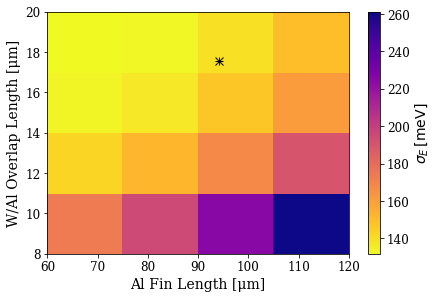

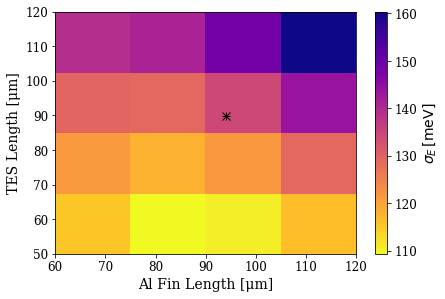

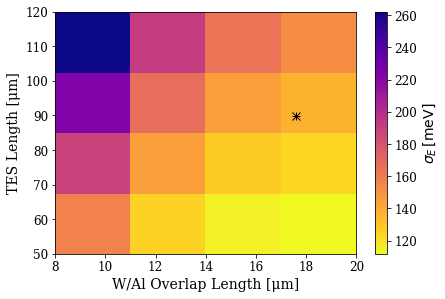

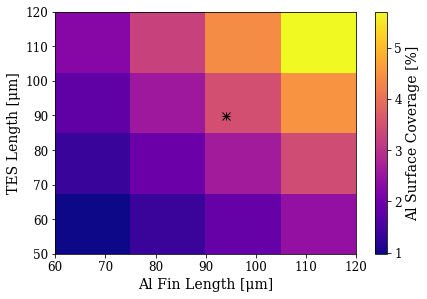

In [6]:
n = 5

l = np.linspace(50e-6, 120e-6, n)
l_f = np.linspace(60e-6, 120e-6, n)
l_overlap = np.linspace(8e-6, 20e-6, n)

plot.plot_loverlap_vs_lfin(l_overlap, l_f, det1, val='energy')
plot.plot_ltes_vs_lfin(l, l_f, det1, val='energy')
plot.plot_ltes_vs_loverlap(l, l_overlap, det1, val='energy')


plot.plot_ltes_vs_lfin(l, l_f, det1, val='al')


### 2 channel device

In [3]:
desired_coverage = 0.04

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11


bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fixrn=True

veff_WAloverlap=.13 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                     n_channel=2,
                                                    bounds = bounds)
veff_WAloverlap=.45 # measured
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                     n_channel=2,
                                                    bounds = bounds)


Effective W/Al volume = 0.13
resolution: 108.1 [meV]
TES Length = 69.6 [μm]
Overlap Legth = 18.5 [μm]
Fin Length = 77.5 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 4.000 [%]
Absolute phonon collection energy efficiency = 31.54 [%]
Number of TESs = 191
Rn = 350.0 [mOhms]
Close Packed: True
Phase margin = 387.4 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 154.5 [meV]
TES Length = 70.7 [μm]
Overlap Legth = 9.7 [μm]
Fin Length = 76.6 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 4.000 [%]
Absolute phonon collection energy efficiency = 24.83 [%]
Number of TESs = 194
Rn = 350.0 [mOhms]
Close Packed: True
Phase margin = 343.2 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


